# Neural Networks: 

## Guide to Tuning Hyperparameters, and Utilizing Pre-Trained Networks

In [1]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Defining a results visualization function
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

## Resources/References/Cheat Codes for Tuning Neural Networks

<img src="https://media.giphy.com/media/st83jeYy9L6Bq/giphy.gif">

### a. Adding nodes and layers

- Number of hidden layers

> For many problems you can start with just one or two hidden layers it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. Very complex tasks, like image classification without convolutional layers, will need dozens of layers.

- Number of neurons per layer

> The number of neurons for the input and output layers is dependent on your data and the task. i.e. input dimensions are determined by your number or columns and your output layer for classification has just one node with a sigmoid activation function. For hidden layers, a common practice is to create a funnel with funnel with fewer and fewer neurons per layer.


In general, you will get more bang for your buck by adding on more layers than adding more neurons.

### b. Activation functions

* One thing important for activation functions is its **differentiability** because the derivative is used in the backpropagation process

<img src='images/activation.png' width=500/>

#### Activation functions for output layers (for supervised learning problems)

1. For binary classification problems: sigmoid activation to coerce values between 0-1
2. For multiclass classification: softmax activation, as it produces a non-negative vector that sums to 1 (probabilities of your test point belonging to the different classes)
3. For regression problems: linear, or relu activation (it is linear and unbounded!)

#### Activation functions for hidden layers

Relevant/useful blog posts (by different authors, despite the similar titles): 
- [Exploring Activation Functions for Neural Networks](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)
    - Discusses why adding non-linear activation functions helps us solve non-linear problems, as well as why an understanding of the derivatives of these activation functions helps us tune NNs more effectively
- [Understanding Activation Functions in Neural Networks](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)
    - Builds the intuitition behind activation functions (despite less-than-stellar grammar and punctuation throughout)

Notes: 
* Sigmoids are not used often because it has a small maximum derivative value and thus propagates only a small amount of error each time, leading to slow "learning" 
* This small-derivative-slow-learning issue is known as a **vanishing gradient** problem
* Tanh is mathematically quite similar to a sigmoid function, thus also has the vanishing gradient issue, but not as bad
* ReLu generally works well because its gradient is always 1, as long as the input is positive (no vanishing gradients), and negative inputs going to 0 can make your network lighter (no weights/biases are being updated)

Here are resources on both the [vanishing gradient](https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/m) and [exploding gradient](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/) problems. 

### c. Loss functions

Loss functions are akin to cost functions we were trying to minimize in gradient descent (i.e. RMSE for linear regression, Gini/entropy for trees)

1. For regression problems, keras has **mean_squared_error** or **mean_absolute_error** as a loss function, or **mean_squared_logarithmic_error** if your target has potential outliers
2. For binary classification: **binary_crossentropy** 
3. For multiclass problems: **categorical_crossentropy**

[This article summarizes the above, and more.](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

### d. Optimizers

Overview Resource: 
- [A (Quick) Guide to Neural Network Optimizers with Applications in Keras](https://towardsdatascience.com/a-quick-guide-to-neural-network-optimizers-with-applications-in-keras-e4635dd1cca4) blog post - an overview of the options

Summary:
* Different optimizers are just different methods/paths that your neural network can take to find optimal values
* Experimentally, Adam (derived from *adaptive moment estimation*) is a good one to use - [here's more about Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

#### Quick optimizer summary

* **RMSProp**: maintains per-parameter learning rates adapted based on the average of recent weight updates (e.g. how quickly it is changing). This does well on non-stationary problems (e.g. noisy data)

* **Adagrad**: maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems)

* **Adam**: realizes the benefits of both AdaGrad and RMSProp. Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance)

### e. Learning rate

* The learning rate is something you can define when you compile your model with the optimizer
* Optimizers usually change up the learning rates, so this is just the *initial* learning rate
* If you set it too low, training will eventually converge, but it will do so slowly
* If you set it too high, it might actually diverge
* If you set it slightly too high, it will converge at first but miss the local optima

### f. Regularization

* As a neural network learns, neuron weights settle into their context within the network
* Weights of neurons are tuned for specific features providing some specialization
* Neighboring neurons become too reliant on this specialization, which if taken too far can result in a fragile model too specialized to the training data
* This reliance on context for a neuron during training is referred to as *complex co-adaptations*

#### Methods
1. You can add L1 or L2 regularization within each hidden layer
2. You can also add a **dropout layer** 
3. Not technically *regularization*, but you can introduce **early stopping** so your model doesn't overtrain

#### Dropout
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. You can add **dropout layers** in your neural network.


## Image Classification Set Up

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


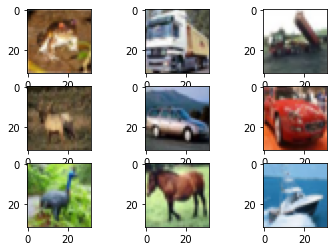

In [3]:
# New dataset!
from keras.datasets import cifar10

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()
# If you get a "downloading data" thing, worry not, shouldn't take long

In [4]:
# Checking the class balance of our data
pd.DataFrame(y_train)[0].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 0, dtype: int64

In [5]:
# Still need to prep our data
# Scale images to the [0, 1] range - max is 255
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### So - What is our Input Shape? What is our Output Shape?

In [6]:
input_shape = (32, 32, 3) # Size of each image - 32x32 for 3 layers
output_shape = 10 # Number of classes, aka number of possible targets (multi class)

In [7]:
# We need to prep our outputs
# Different from binary classification!
y_train = keras.utils.to_categorical(y_train, output_shape)
y_test = keras.utils.to_categorical(y_test, output_shape)

print("y_train shape:",y_train.shape)

y_train shape: (50000, 10)


In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## First - Simple Multi-Layer Perceptron!

In [9]:
# Model building in a single list
model = keras.Sequential(
    [
        keras.Input(shape=input_shape), # Don't always need this input separately
        layers.Flatten(), # need to flatten our images to be one long array
        layers.Dense(64, activation="tanh"),
        layers.Dense(output_shape, activation="softmax"),
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size = int(X_train.shape[0]/20)
epochs = 15

# Compiling our model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit our model (save output to a history variable)
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))

Epoch 1/15
20/20 [==============================] - 1s 28ms/step - loss: 2.5603 - accuracy: 0.1597 - val_loss: 2.2479 - val_accuracy: 0.2133
Epoch 2/15
20/20 [==============================] - 0s 18ms/step - loss: 2.1631 - accuracy: 0.2140 - val_loss: 2.0885 - val_accuracy: 0.2427
Epoch 3/15
20/20 [==============================] - 0s 24ms/step - loss: 2.0450 - accuracy: 0.2622 - val_loss: 2.0019 - val_accuracy: 0.3026
Epoch 4/15
20/20 [==============================] - 0s 22ms/step - loss: 1.9716 - accuracy: 0.3065 - val_loss: 1.9455 - val_accuracy: 0.3213
Epoch 5/15
20/20 [==============================] - 0s 21ms/step - loss: 1.9272 - accuracy: 0.3265 - val_loss: 1.9068 - val_accuracy: 0.3307
Epoch 6/15
20/20 [==============================] - 0s 20ms/step - loss: 1.8915 - accuracy: 0.3447 - val_loss: 1.8772 - val_accuracy: 0.3397
Epoch 7/15
20/20 [==============================] - 0s 18ms/step - loss: 1.8580 - accuracy: 0.3555 - val_loss: 1.8420 - val_accuracy: 0.3603
Epoch 8/15
20

Test loss: 1.7316334247589111
Test accuracy: 0.3930000066757202


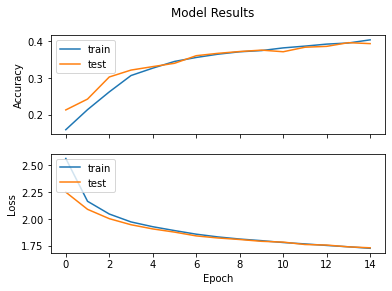

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

visualize_training_results(history)

Evaluate:

- 


## Next: Simple CNN

In [13]:
# Model building using "add"

cnn = keras.Sequential()
# We defined a variable input_shape earlier, can use that here
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=input_shape))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))

# now, to get the proper output
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [15]:
history = cnn.fit(X_train,
                  y_train,
                  epochs=2, # small since this is just a demo
                  batch_size=batch_size,
                  validation_data=(X_test, y_test))
# note - even with just 2 epochs this'll take at least a few minutes

Epoch 1/2
20/20 [==============================] - 71s 4s/step - loss: 2.1635 - accuracy: 0.1867 - val_loss: 1.8989 - val_accuracy: 0.3023
Epoch 2/2
20/20 [==============================] - 76s 4s/step - loss: 1.8863 - accuracy: 0.3147 - val_loss: 1.7416 - val_accuracy: 0.3646


Test loss: 1.7416396141052246
Test accuracy: 0.3646000027656555


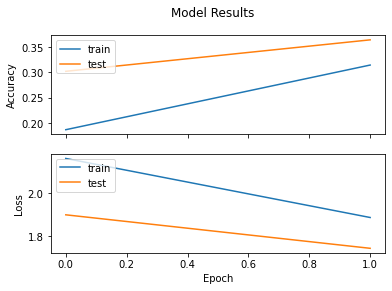

In [16]:
# Evaluate!
score = cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Visualize results
visualize_training_results(history)

A worked-through example on this dataset: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

### Using Pre-Trained Layers

A pretrained network (also known as a convolutional base for CNNs) consists of layers that have already been trained on typically general data. For images, these layers have already learned general patterns, textures, colors, etc. such that when you feed in your training data, certain features can immediately be detected. This part is **feature extraction**.

You typically add your own final layers to train the network to classify/regress based on your problem. This component is **fine tuning**

Here are the pretrained image classification models that exist within Keras: https://keras.io/api/applications/

VGG19: https://keras.io/api/applications/vgg/#vgg19-function

In [ ]:
from keras.applications import VGG19

In [ ]:
pretrained = VGG19(weights='imagenet',
                   include_top=False, # Allows us to set input shape
                   input_shape=input_shape) 
# May download data at this step, shouldn't take long

In [ ]:
pretrained.summary()

In [ ]:
cnn = keras.models.Sequential()
cnn.add(pretrained)

# freezing layers so they don't get re-trained with your new data
for layer in cnn.layers:
    layer.trainable=False 

In [ ]:
# adding our own dense layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(1, activation='softmax'))

In [ ]:
cnn.summary()

In [ ]:
# to verify that the weights are "frozen" 
for layer in cnn.layers:
    print(layer.name, layer.trainable)

With this you can now compile and fit your model!

In [ ]:
cnn.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train_resized,
                  y_train,
                  epochs=5, 
                  batch_size=64,
                  validation_data=(X_test_resized, y_test))